In [2]:
import numpy as np 
import pandas as pd
from pandas import read_csv

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
print(np.shape(data))


(506, 14)


In [5]:
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# 1-Calculer la matrice de variance-covariance
La matrice de variance–covariance sert à décrire la dispersion des variables et leurs relations linéaires.

In [6]:
# 1-Calculer la matrice de variance-covariance
cov_matrix = data.cov()
print("Matrice de variance-covariance :")
print(cov_matrix)

Matrice de variance-covariance :
               CRIM           ZN       INDUS      CHAS        NOX         RM  \
CRIM      73.986578   -40.215956   23.992339 -0.122109   0.419594  -1.325038   
ZN       -40.215956   543.936814  -85.412648 -0.252925  -1.396148   5.112513   
INDUS     23.992339   -85.412648   47.064442  0.109669   0.607074  -1.887957   
CHAS      -0.122109    -0.252925    0.109669  0.064513   0.002684   0.016285   
NOX        0.419594    -1.396148    0.607074  0.002684   0.013428  -0.024603   
RM        -1.325038     5.112513   -1.887957  0.016285  -0.024603   0.493671   
AGE       85.405322  -373.901548  124.513903  0.618571   2.385927  -4.751929   
DIS       -6.876722    32.629304  -10.228097 -0.053043  -0.187696   0.303663   
RAD       46.847761   -63.348695   35.549971 -0.016296   0.616929  -1.283815   
TAX      844.821538 -1236.453735  833.360290 -1.523367  13.046286 -34.583448   
PTRATIO    5.399331   -19.776571    5.692104 -0.066819   0.047397  -0.540763   
B      

In [7]:
#2. Interprétez les valeurs de variance (diagonale) et de covariance
# Extraire les variances (diagonale)
variances = np.diag(cov_matrix)
print("\nVariances de chaque variable :")
for i, col in enumerate(data.columns):
    print(f"{col}: {variances[i]:.4f}")


Variances de chaque variable :
CRIM: 73.9866
ZN: 543.9368
INDUS: 47.0644
CHAS: 0.0645
NOX: 0.0134
RM: 0.4937
AGE: 792.3584
DIS: 4.4340
RAD: 75.8164
TAX: 28404.7595
PTRATIO: 4.6870
B: 8334.7523
LSTAT: 50.9948
MEDV: 84.5867


Interprétation des variances (diagonale)

Les valeurs de variance indiquent la dispersion de chaque variable autour de sa moyenne.
On observe par exemple que AGE (792.35), ZN (543.93) et TAX (28 404.76) possèdent des variances très élevées : ce sont des variables très dispersées, avec beaucoup de variation dans le dataset.
À l’inverse, des variables comme NOX (0.013), CHAS (0.064) ou RM (0.49) présentent une faible variance, ce qui signifie qu’elles varient peu entre les observations.

Les covariances révèlent des relations importantes : TAX et RAD varient fortement ensemble, tout comme AGE et INDUS. Les relations négatives montrent que les zones résidentielles sont opposées aux zones industrielles et aux zones fortement taxées. Certaines variables, comme CHAS, ont une covariance proche de zéro avec la plupart des autres, indiquant peu de relation linéaire.

3. Identifiez les paires de variables avec les covariances les plus élevées


In [8]:
pairs = []

for i in range(len(cov_matrix.columns)):
    for j in range(i+1, len(cov_matrix.columns)):  
        var1 = cov_matrix.columns[i]
        var2 = cov_matrix.columns[j]
        cov_value = cov_matrix.iloc[i, j]
        pairs.append((var1, var2, cov_value))

# Convertir en DataFrame
pairs_df = pd.DataFrame(pairs, columns=["Variable 1", "Variable 2", "Covariance"])

# Trier par covariance
sorted_pairs = pairs_df.sort_values(by="Covariance", ascending=False)

print("\n--- Plus forte covariance positive ---")
print(sorted_pairs.head(10))



--- Plus forte covariance positive ---
   Variable 1 Variable 2   Covariance
65        AGE        TAX  2402.690122
76        RAD        TAX  1335.756577
8        CRIM        TAX   844.821538
31      INDUS        TAX   833.360290
83        TAX      LSTAT   654.714520
22         ZN          B   373.721402
89          B       MEDV   279.989834
81        TAX    PTRATIO   168.153141
28      INDUS        AGE   124.513903
68        AGE      LSTAT   121.077725


4. Comparez la matrice de covariance avec la matrice de corrélation : quelles différences observez-vous?

In [9]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

print("\nMatrice de corrélation :")
print(corr_matrix)

print("\nMatrice de covariance :")
print(cov_matrix)



Matrice de corrélation :
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B 

La matrice de corrélation est normalisée, chaque valeur étant divisée par l’écart-type des variables correspondantes, ce qui rend les coefficients comparables et indépendants des unités de mesure. En revanche, la matrice de covariance n’est pas normalisée, chaque valeur dépend donc de l’échelle et des unités des variables, ce qui la rend sensible à l’ampleur et à la distribution des données.

5. Calculez les valeurs propres et vecteurs propres de cette matrice

In [10]:
# Calculer les valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('\nles valeurs propres : ',eigenvalues)
print('\nles vecteurs propres : ',eigenvectors)


les valeurs propres :  [3.09100129e+04 6.25081428e+03 8.22464007e+02 2.67296502e+02
 7.70431236e+01 4.66834420e+01 1.70629028e+01 1.35584446e+01
 8.90961528e+00 2.72121107e+00 1.10202414e+00 2.17934498e-01
 5.91054423e-02 2.92529621e-03]

les vecteurs propres :  [[ 2.92941977e-02  6.67046853e-03 -1.20190050e-02 -2.53543496e-02
  -2.72141253e-01 -9.29714844e-01  1.57393698e-01  1.51118705e-01
  -1.06241350e-01 -2.19357372e-02  2.22033012e-02  2.49322079e-03
  -1.30435791e-03  7.47506930e-04]
 [-4.36119495e-02  1.11892970e-03  6.32165973e-01 -7.63156509e-01
  -9.19303840e-02  3.88260164e-02  3.81906455e-02  6.54826595e-03
   5.72329143e-02 -1.72580529e-02 -3.18570594e-02  2.58458416e-03
  -1.04865904e-04  1.19284997e-05]
 [ 2.83285521e-02 -4.94446469e-03 -8.83907030e-02  1.30715436e-02
  -5.70491282e-02  1.25956813e-01  8.60001935e-01  7.86092364e-02
   4.65313822e-01 -6.08457985e-03  9.73372356e-02 -1.31501410e-02
   8.27512718e-03 -4.10922425e-03]
 [-5.58686577e-05 -1.03158562e-04 -9.

Analyse en Composantes Principales (ACP) 


In [11]:
#1. Standardisez les variables et justifiez cette étape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the Scaler
scaler.fit(data)

# Transforming the Data using the above fitted scaler
scaled_data = scaler.transform(data)
scaled_data



array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [12]:
scaled_data = pd.DataFrame(scaled_data, columns = [data.columns])
scaled_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


#justifier : 
Nous devons standardiser les variables avant de réaliser une ACP, car les différentes variables du jeu de données n’ont pas la même échelle.
Par exemple, certaines variables comme TAX peuvent atteindre des valeurs très élevées, alors que d’autres comme CRIM ou LSTAT ont des valeurs beaucoup plus petites.
Sans standardisation, les variables ayant les valeurs les plus grandes prendraient trop d’importance dans le calcul des composantes principales.

#La standardisation (centrage-réduction) rend toutes les variables comparables et permet à l’ACP de capturer la structure réelle des corrélations.

In [13]:
from sklearn.decomposition import PCA
X = scaled_data.drop(columns=["MEDV"])
# Application de l’ACP
pca = PCA()  # toutes les composantes
X_pca = pca.fit_transform(X)

# Afficher les premières valeurs
X_pca[:5]

C:\Users\TESS\AppData\Local\Temp\ipykernel_7756\1733478660.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = scaled_data.drop(columns=["MEDV"])


array([[-2.09829747,  0.77311275,  0.34294273, -0.89177403, -0.42307036,
         0.31533814,  0.31864075, -0.2958318 , -0.42493682, -0.64020641,
         0.03300036,  0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, -0.48745853,  0.19587567,
        -0.26422321,  0.55386126,  0.22366994, -0.16696207, -0.08423646,
         0.64080983, -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , -0.73920419,  0.93453406,
        -0.44809462,  0.48455996, -0.10516613,  0.06977513,  0.18038003,
         0.48755672,  0.13332653, -0.0140218 ],
       [-2.61150357, -0.00687062, -0.10028413, -0.34372124,  1.10495596,
        -0.6646495 ,  0.62264086, -0.25594078, -0.34224574, -0.04590132,
         0.36020874,  0.50867761,  0.00784692],
       [-2.45818501,  0.09771195, -0.07534821, -0.42790688,  1.06592426,
        -0.6170472 ,  0.70508599,  0.13452405, -0.41766778,  0.1408798 ,
         0.39514988,  0.49773174,  0.01427426]])

3. Calculez et visualisez la variance expliquée par chaque composante

In [22]:
myPCA = PCA(n_components=13)  

# Fitting the data
x = myPCA.fit_transform(X)
print("Variance expliquée par Components :", myPCA.explained_variance_)
print("Percent Variance explained by Components are:", myPCA.explained_variance_ratio_)
print("Cumulative Percent Variance Explained by Components are:", 
      np.cumsum(myPCA.explained_variance_ratio_))

Variance expliquée par Components : [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
Percent Variance explained by Components are: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
Cumulative Percent Variance Explained by Components are: [0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876
 0.89906884 0.92953786 0.9508412  0.96778257 0.98209137 0.99511467
 1.        ]


C:\Users\TESS\AppData\Local\Temp\ipykernel_7756\758976932.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number_of_components", y="Variance_Cumulee",
C:\Users\TESS\AppData\Local\Temp\ipykernel_7756\758976932.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


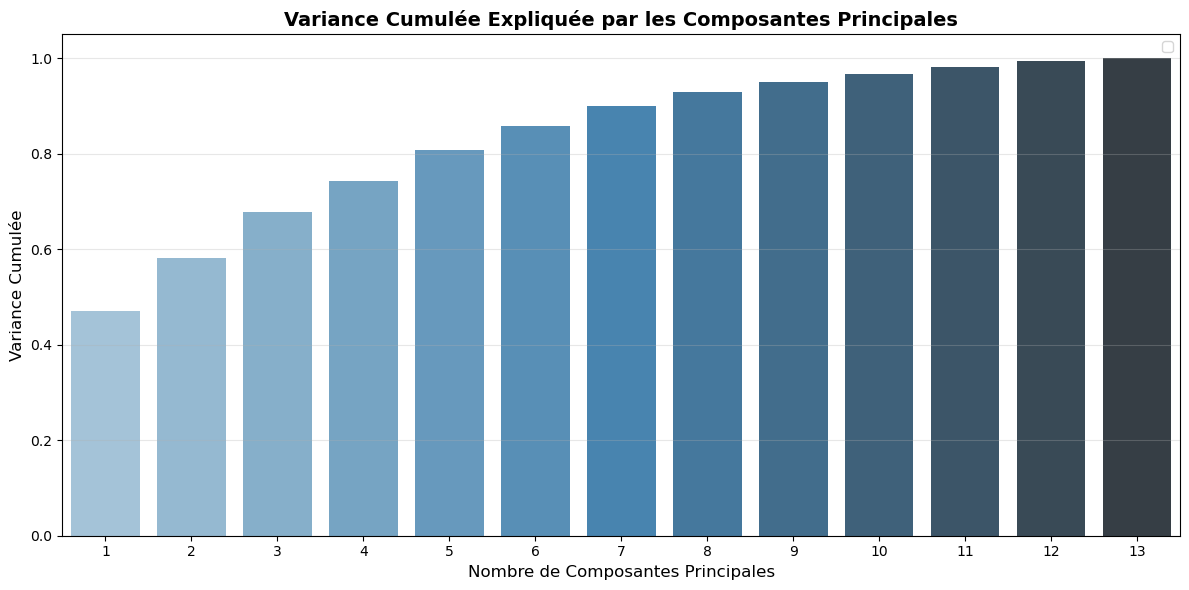

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un DataFrame pour seaborn
Cum_Var_Exp = pd.DataFrame({
    'Number_of_components': range(1, 14),
    'Variance_Cumulee': np.cumsum(myPCA.explained_variance_ratio_),
    'Variance_Individuelle': myPCA.explained_variance_ratio_
})

# Barplot de la variance cumulée
plt.figure(figsize=(12, 6))
sns.barplot(x="Number_of_components", y="Variance_Cumulee", 
            data=Cum_Var_Exp, palette="Blues_d")
plt.xlabel('Nombre de Composantes Principales', fontsize=12)
plt.ylabel('Variance Cumulée', fontsize=12)
plt.title('Variance Cumulée Expliquée par les Composantes Principales', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#5

5. Visualisez le cercle des corrélations : quelles variables contribuent le plus aux PC1 et PC2?

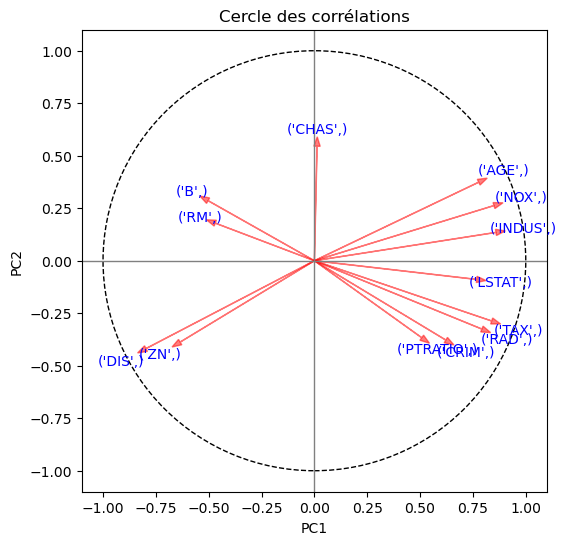

In [28]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
cor_var = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(6,6))
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, cor_var[i,0], cor_var[i,1],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(cor_var[i,0]*1.15, cor_var[i,1]*1.15, var, color='b', ha='center', va='center')

# Cercle unité
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black', linestyle='--')
plt.gca().add_artist(circle)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

#demander au Prof : : quelles variables contribuent le plus aux PC1 et PC2?
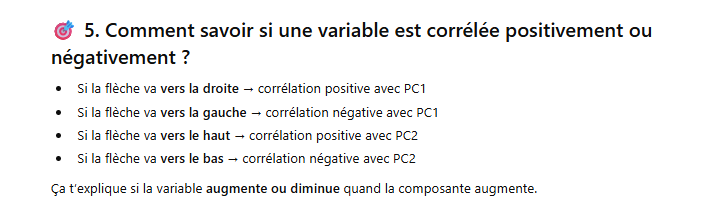

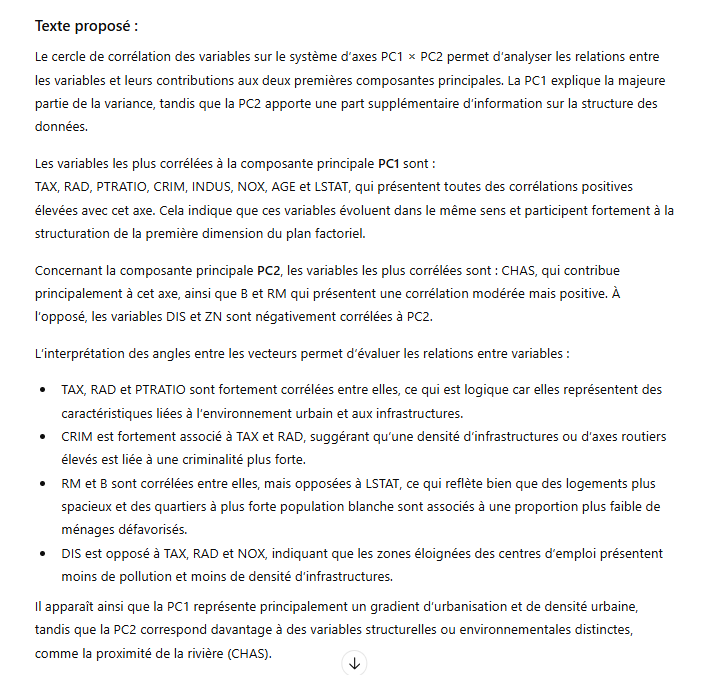

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Mall_Customers.csv')
df.head(10)



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:

df1=df[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

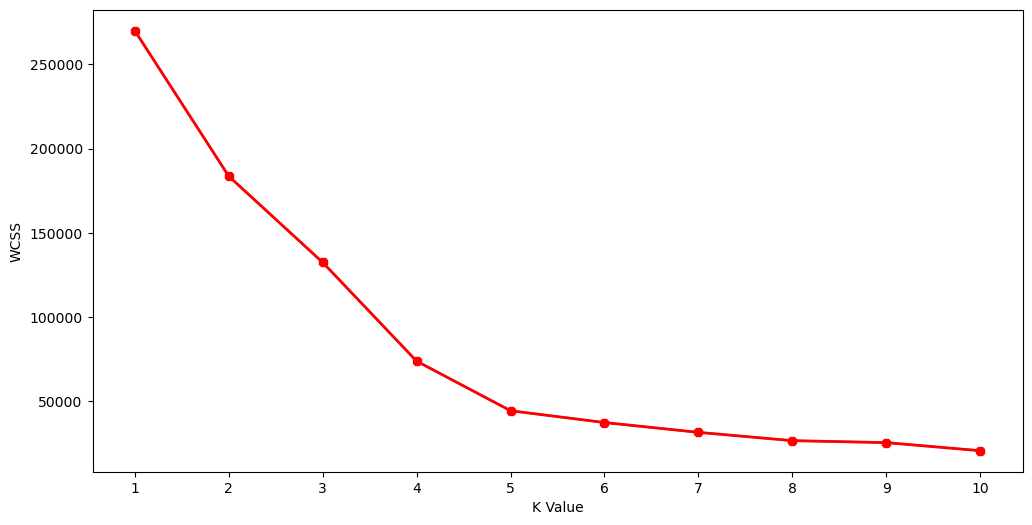

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()
    

In [46]:
#k optimal =5
#2.. Appliquez K-Means avec k optimal sur les données originales
#5 clusters
km1=KMeans(n_clusters=5)
#fitting the input data
km1.fit(x)
#predecting the lables of the input data
y=km1.predict(x)
#adding the labels to a column named label
df1["label"]=y
df1.head()

C:\Users\TESS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [44]:
#3. Appliquez K-Means sur les composantes principales retenues
#much be done after the the other part 
#PCA → garder 2 ou 3 composantes (celles qui expliquent 80–95% de la variance)
from sklearn.decomposition import PCA



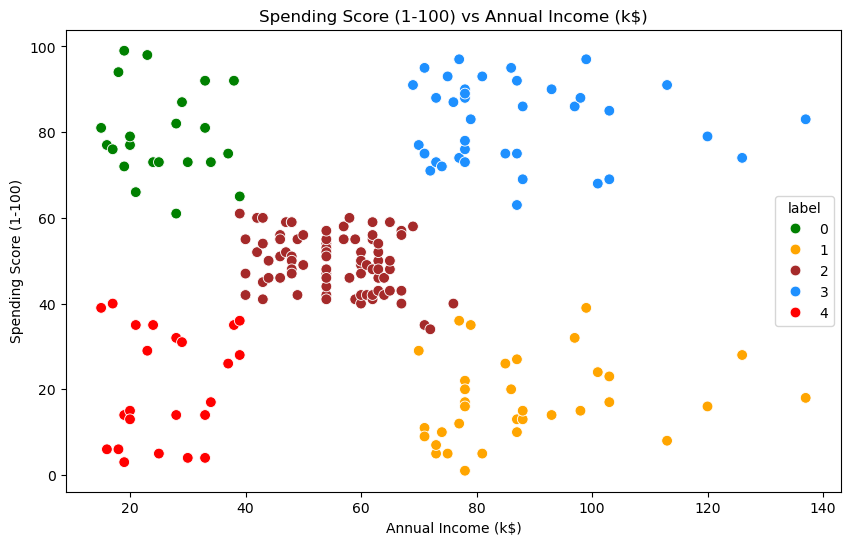

In [28]:
#4. Visualisez en scatter plot : Income vs Spending Score (coloré par cluster)
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [43]:
#Caractériser 
# K-Means cluster characteristics
# Caractériser les clusters
for cluster in sorted(df1['label'].unique()):
    print(f"\nCluster {cluster}:")
    print(df1[df1['label'] == cluster][["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())



Cluster 0:
Age                       25.272727
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
dtype: float64

Cluster 1:
Age                       41.114286
Annual Income (k$)        88.200000
Spending Score (1-100)    17.114286
dtype: float64

Cluster 2:
Age                       42.716049
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
dtype: float64

Cluster 3:
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64

Cluster 4:
Age                       45.217391
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
dtype: float64


In [58]:
# 5. CARACTÉRISATION COMPLÈTE DE CHAQUE CLUSTER

import pandas as pd

for i in range(5):
    cluster = df1[df1['label'] == i]
    print(f"CLUSTER {i}")
    # 1. TAILLE
    print(f"   Nombre de clients: {len(cluster)}")
    print(f"   Pourcentage: {len(cluster)/len(df1)*100:.2f}%")
    
    # 2. STATISTIQUES DESCRIPTIVES
    print("\n   Age:")
    print(f"      Moyenne: {cluster['Age'].mean():.2f} ans")
    print(f"      Min: {cluster['Age'].min()} ans")
    print(f"      Max: {cluster['Age'].max()} ans")
    print(f"      Écart-type: {cluster['Age'].std():.2f}")
    
    print(f"\n   Annual Income (k$):")
    print(f"      Moyenne: {cluster['Annual Income (k$)'].mean():.2f}k$")
    print(f"      Min: {cluster['Annual Income (k$)'].min()}k$")
    print(f"      Max: {cluster['Annual Income (k$)'].max()}k$")
    print(f"      Écart-type: {cluster['Annual Income (k$)'].std():.2f}")
    
    print(f"\n   Spending Score (1-100):")
    print(f"      Moyenne: {cluster['Spending Score (1-100)'].mean():.2f}/100")
    print(f"      Min: {cluster['Spending Score (1-100)'].min()}/100")
    print(f"      Max: {cluster['Spending Score (1-100)'].max()}/100")
    print(f"      Écart-type: {cluster['Spending Score (1-100)'].std():.2f}")
    
    # 3. RÉPARTITION PAR GENRE
    print(f"\n RÉPARTITION PAR GENRE:")
    nb_femmes = (cluster['Genre'] == 'Female').sum()
    nb_hommes = (cluster['Genre'] == 'Male').sum()
    print(f"   Femmes: {nb_femmes} ({nb_femmes/len(cluster)*100:.2f}%)")
    print(f"   Hommes: {nb_hommes} ({nb_hommes/len(cluster)*100:.2f}%)")
    
    # 4. PROFIL TYPE
    print(f"\n PROFIL TYPE:")
    revenu = cluster['Annual Income (k$)'].mean()
    score = cluster['Spending Score (1-100)'].mean()
    age = cluster['Age'].mean()
    print("revenu",revenu)
    print("score",score)
    print("age",age)

CLUSTER 0
   Nombre de clients: 81
   Pourcentage: 40.50%

   Age:
      Moyenne: 42.72 ans
      Min: 18 ans
      Max: 70 ans
      Écart-type: 16.45

   Annual Income (k$):
      Moyenne: 55.30k$
      Min: 39k$
      Max: 76k$
      Écart-type: 8.99

   Spending Score (1-100):
      Moyenne: 49.52/100
      Min: 34/100
      Max: 61/100
      Écart-type: 6.53

 RÉPARTITION PAR GENRE:
   Femmes: 48 (59.26%)
   Hommes: 33 (40.74%)

 PROFIL TYPE:
revenu 55.2962962962963
score 49.51851851851852
age 42.71604938271605
CLUSTER 1
   Nombre de clients: 39
   Pourcentage: 19.50%

   Age:
      Moyenne: 32.69 ans
      Min: 27 ans
      Max: 40 ans
      Écart-type: 3.73

   Annual Income (k$):
      Moyenne: 86.54k$
      Min: 69k$
      Max: 137k$
      Écart-type: 16.31

   Spending Score (1-100):
      Moyenne: 82.13/100
      Min: 63/100
      Max: 97/100
      Écart-type: 9.36

 RÉPARTITION PAR GENRE:
   Femmes: 21 (53.85%)
   Hommes: 18 (46.15%)

 PROFIL TYPE:
revenu 86.53846153846153


In [ ]:
#6. Comparez les résultats K-Means sur données originales vs sur composantes principales
